In [13]:
import pandas as pd
import numpy as np

In [11]:
gender = ['male' if i < 4 else 'female' for i in range(8)]
u_age = ['age' if i % 7 ==0 else 'under_age' for i in range(8)]
change = ['change', 'not change', 'not change', 'change', 'change', 'not change', 'not change', 'change']
# change[1:3]  = 'not change'
df = pd.DataFrame([gender, u_age, change]).T
df

,0,1,2
0,male,age,change
1,male,under_age,not change
2,male,under_age,not change
3,male,under_age,change
4,female,under_age,change
5,female,under_age,not change
6,female,under_age,not change
7,female,age,change


In [31]:
g = 'male'
df_ = df[df[0]==g]
p_change = len(df_[df_[2]=='change'])/len(df_)
p_uchange = 1 - p_change

H_male = -p_change * np.log2(p_change) - p_uchange * np.log2(p_uchange)

g = 'female'
df_ = df[df[0]==g]
p_change = len(df_[df_[2]=='change'])/len(df_)
p_uchange = 1 - p_change

H_female = -p_change * np.log2(p_change) - p_uchange * np.log2(p_uchange)
H_male, H_female

(1.0, 1.0)

In [55]:
a = 'age'
df_ = df[df[1]==a]
p_change = len(df_[df_[2]=='change'])/len(df_)
p_uchange = 1 - p_change

# H_age = -p_change * np.log2(p_change) - p_uchange * np.log2(p_uchange)
H_age = 0 

a = 'under_age'
df_ = df[df[1]==a]
p_change = len(df_[df_[2]=='change'])/len(df_)
p_uchange = 1 - p_change

H_uage = -p_change * np.log2(p_change) - p_uchange * np.log2(p_uchange)
H_age, H_uage

(0, 0.9182958340544896)

In [56]:
p_change = len(df[df[2]=='change'])/len(df)
p_nchange = 1 - p_change
H_change = -p_change * np.log2(p_change) - p_nchange * np.log2(p_nchange)
H_change

1.0

In [57]:
p_male = len(df[df[0]=='male'])/len(df)
p_female = 1 - p_male

p_age = len(df[df[1]=='age'])/len(df)
p_uage = 1 - p_age

IG_gender = H_change - p_male*H_male - p_female*H_female
print(IG_gender)

IG_age = H_change - p_age*H_age - p_uage*H_uage
print(IG_age)

0.0
0.31127812445913283


In [79]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [133]:
X, y = make_blobs(random_state=1, n_features=2, centers=3, cluster_std=0.6, n_samples=300)
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, random_state=1)
TreeModel = DecisionTreeClassifier(max_depth=None, random_state=1)
TreeModel.fit(X_tr, y_tr)

pred = TreeModel.predict(X_ts)
score = accuracy_score(y_ts, pred)
print('Accuracy: {}%'.format(score*100))

Accuracy: 100.0%


[Text(0.4, 0.8333333333333334, 'df[1] <= -5.7\ngini = 0.666\nsamples = 225\nvalue = [72, 77, 76]\nclass = 1'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 76]\nclass = 2'),
 Text(0.6, 0.5, 'df[1] <= 0.231\ngini = 0.499\nsamples = 149\nvalue = [72, 77, 0]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 77\nvalue = [0, 77, 0]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 72\nvalue = [72, 0, 0]\nclass = 0')]

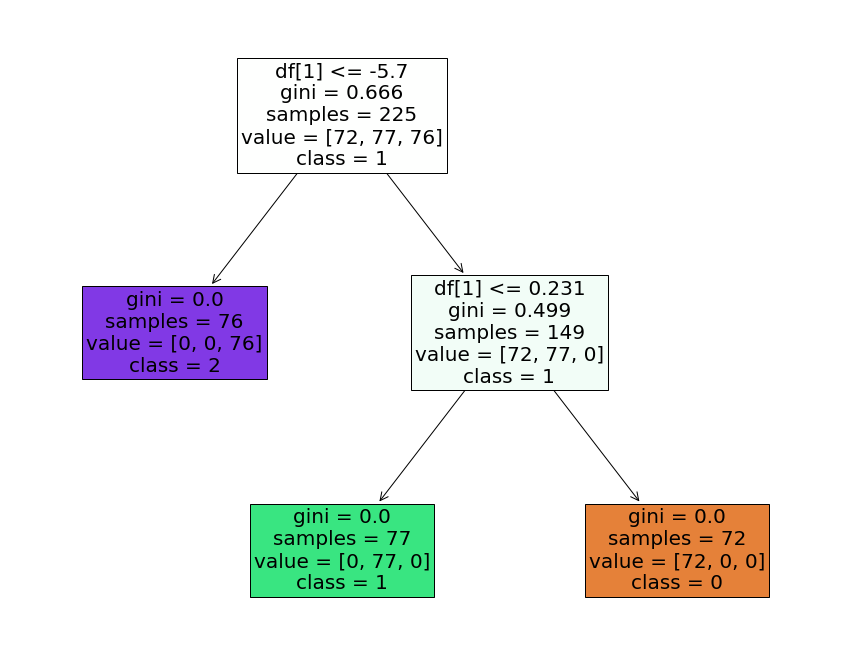

In [134]:
df = pd.DataFrame(X_ts)
plt.figure(figsize=(15, 12))
plot_tree(TreeModel, fontsize=20, filled=True, feature_names=['df[0]', 'df[1]'], class_names=['0', '1', '2'])

In [149]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
data=load_wine()
X, y = data.data, data.target
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.3, random_state=0)
TreeModel = RandomForestClassifier()
TreeModel.fit(X_tr, y_tr)

pred = TreeModel.predict(X_ts)
score = accuracy_score(y_ts, pred)
print('Accuracy: {}%'.format(score*100))

Accuracy: 98.14814814814815%


In [150]:
for name, val in zip(data['feature_names'], TreeModel.feature_importances_):
    print('{} :\n    {}'.format(name, val))

alcohol :
    0.09063027879525486
malic_acid :
    0.019575381162767882
ash :
    0.008465736226283143
alcalinity_of_ash :
    0.02541376775463195
magnesium :
    0.02661900702573976
total_phenols :
    0.048924718937554956
flavanoids :
    0.16789884726254192
nonflavanoid_phenols :
    0.015669694977824285
proanthocyanins :
    0.032485838668454406
color_intensity :
    0.22145341590083356
hue :
    0.06341757436777112
od280/od315_of_diluted_wines :
    0.14646758649485386
proline :
    0.13297815242548833


<BarContainer object of 13 artists>

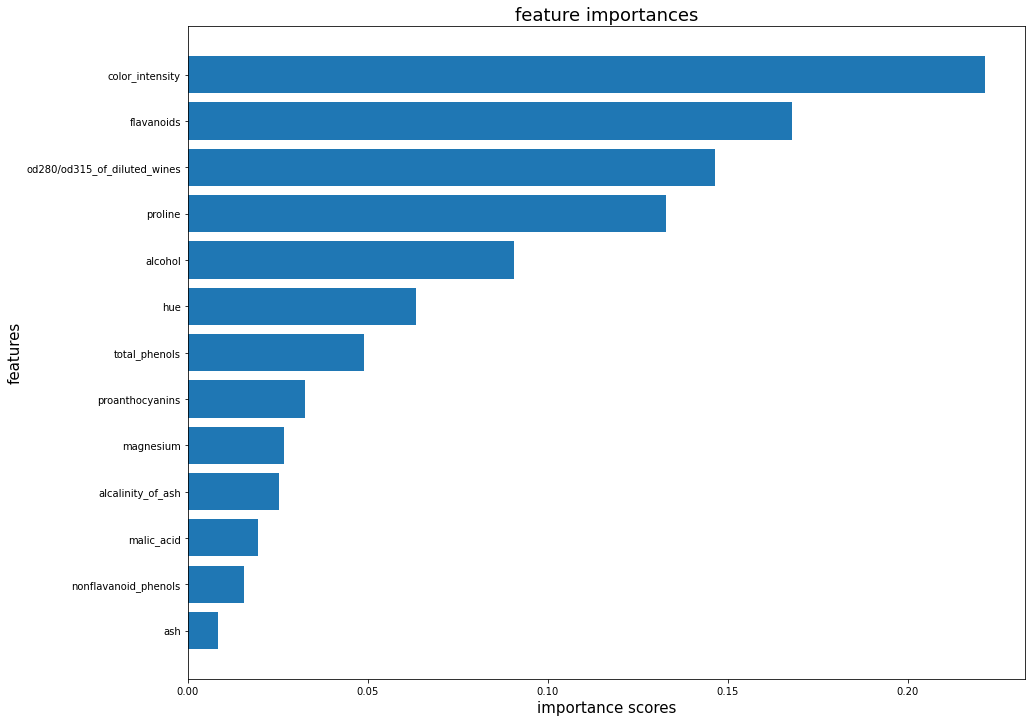

In [151]:
df_wine = pd.DataFrame([[name, val]for name, val in zip(data['feature_names'], TreeModel.feature_importances_)])
df_wine = df_wine.sort_values(1)
plt.figure(figsize=(15, 12))
plt.title('feature importances', fontsize=18)
plt.xlabel('importance scores', fontsize=15)
plt.ylabel('features', fontsize=15)
plt.barh(df_wine[0], df_wine[1])